In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Step 2: Load the Iris dataset from Scikit-learn
iris = load_iris()

# Convert to DataFrame for better handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# View the first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Step 3.1: Check for missing values
print("Missing values:\n", df.isnull().sum())

# Step 3.2: Feature scaling (standardization)
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

# Step 3.3: Split into training and testing datasets (80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


📌 Logistic Regression Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



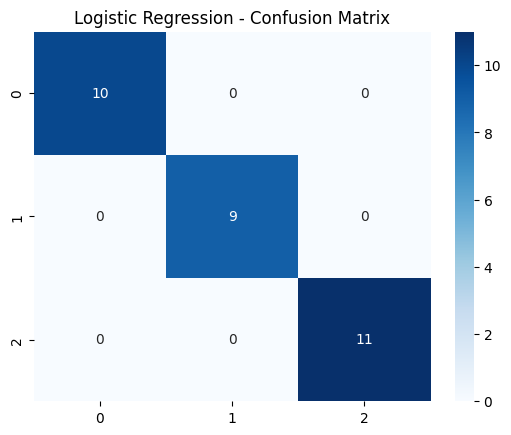

In [5]:
# Step 4.1: Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


📌 K-Nearest Neighbors Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



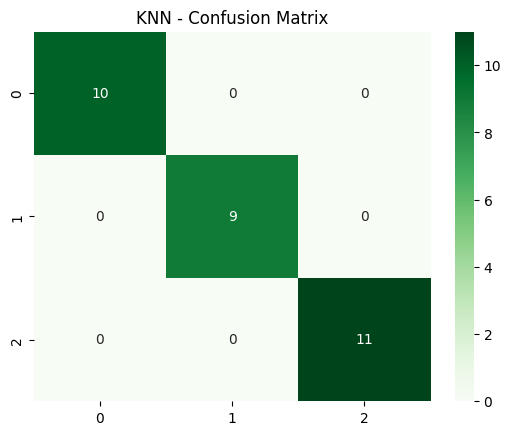

In [6]:
# Step 5.1: KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("📌 K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Greens', fmt='d')
plt.title("KNN - Confusion Matrix")
plt.show()


📌 Decision Tree Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



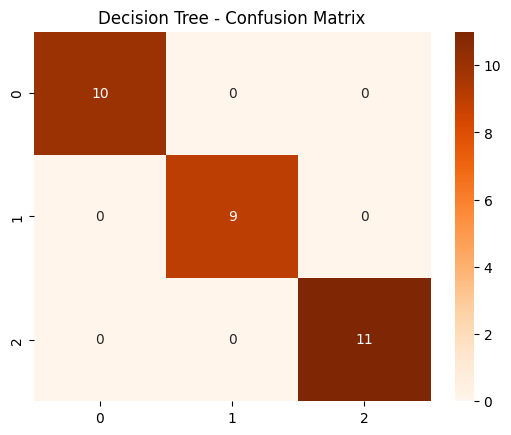

In [7]:
# Step 6.1: Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("📌 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap='Oranges', fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameters for tuning
param_grid_knn = {'n_neighbors': list(range(1, 11))}

# Initialize model and grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Best parameter and score
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Score (Cross-validated Accuracy):", grid_knn.best_score_)


Best KNN Parameters: {'n_neighbors': 3}
Best KNN Score (Cross-validated Accuracy): 0.95


In [9]:
param_grid_tree = {'max_depth': list(range(1, 10))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

# Best parameter and score
print("Best Decision Tree max_depth:", grid_tree.best_params_)
print("Best Decision Tree Score (Cross-validated Accuracy):", grid_tree.best_score_)


Best Decision Tree max_depth: {'max_depth': 6}
Best Decision Tree Score (Cross-validated Accuracy): 0.95


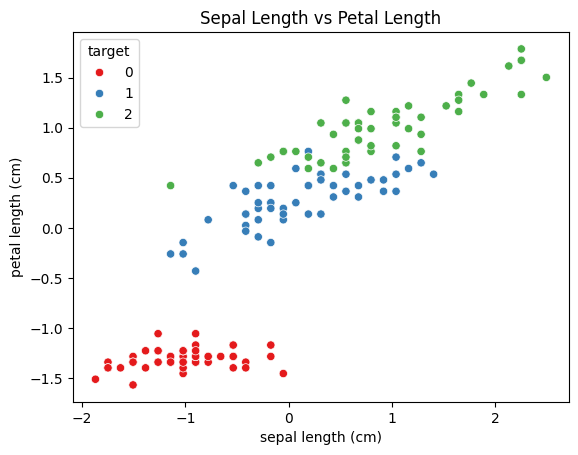

In [10]:
# Convert back to DataFrame for plotting
df_scaled = pd.DataFrame(X, columns=iris.feature_names)
df_scaled['target'] = y

# Plot Sepal length vs Petal length
sns.scatterplot(data=df_scaled, x='sepal length (cm)', y='petal length (cm)', hue='target', palette='Set1')
plt.title('Sepal Length vs Petal Length')
plt.show()


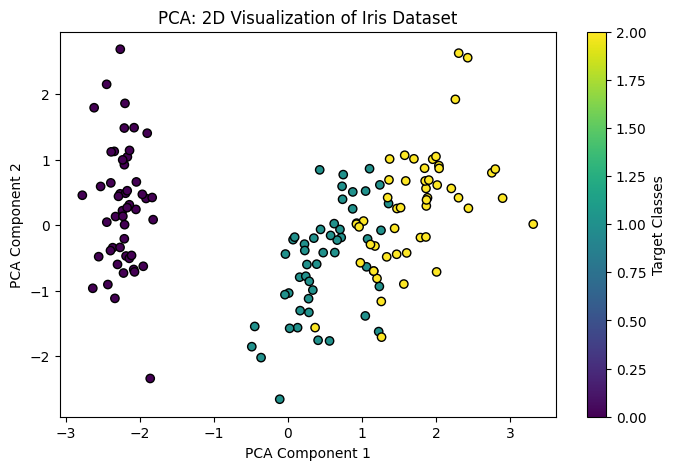

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("PCA: 2D Visualization of Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Target Classes')
plt.show()
